## Observations and Insights 

Observations:
    Of the treatment options, the drugs Capomulin and Ramicane show the lowest average tumor volume. However, further analysis into the change in tumor size may provide more insight than looking at the raw tumor volume instead.
    Looking at the bar charts showing the number of mice per treatment group, the Capomulin and Ramicane groups also had the largest number of mice in each group of all the treatment regimens, therefore the data is likely more accurate due to the larger sample size, further reinforcing confidence in these two treatments.
    When looking at the average tumor volume versus mouse weight for the Capomulin group, there was a positive, relatively strong correlation in the data with an r-squared value of 0.71 and a positive slope. This implies that larger mice are also attributed with larger tumor size.

In [228]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress
pd.options.display.max_columns = None
pd.options.display.max_rows = None

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)


In [117]:
# Combine the data into a single dataset
raw_data = mouse_metadata.merge(study_results, on='Mouse ID', how = 'outer')
# Display the data table for preview
raw_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [118]:
# Checking the number of mice.
raw_data["Mouse ID"].nunique()

249

In [119]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
raw_data.groupby(["Mouse ID"]).count()


,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
a203,10,10,10,10,10,10,10
a251,10,10,10,10,10,10,10
a262,10,10,10,10,10,10,10
a275,10,10,10,10,10,10,10
a366,7,7,7,7,7,7,7
a401,10,10,10,10,10,10,10
a411,10,10,10,10,10,10,10
a444,10,10,10,10,10,10,10
a457,3,3,3,3,3,3,3


In [120]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
finalized_data = raw_data.drop_duplicates(subset = ['Mouse ID','Timepoint'], keep='last')

In [121]:
# Checking the number of mice in the clean DataFrame.
finalized_data["Mouse ID"].nunique()
len(finalized_data)

1888

## Summary Statistics

In [122]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

treatment_data = finalized_data.groupby('Drug Regimen')

treatment_mean = treatment_data['Tumor Volume (mm3)'].mean()
treatment_median = treatment_data['Tumor Volume (mm3)'].median()
treatment_variance = treatment_data['Tumor Volume (mm3)'].var()
treatment_st_dev = treatment_data['Tumor Volume (mm3)'].std()
treatment_SEM = treatment_data['Tumor Volume (mm3)'].sem()

treatment_summary = pd.DataFrame({"Mean": treatment_mean,
                                "Median": treatment_median,
                                "Variance": treatment_variance,
                                "Standard Deviation": treatment_st_dev,
                                "SEM" : treatment_SEM})
treatment_summary

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.382993,50.783528,43.220205,6.574208,0.526358
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [123]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
finalized_data.groupby('Drug Regimen').agg({'Tumor Volume (mm3)':['mean','median','var','std','sem']})

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.382993  50.783528  43.220205  6.574208  0.526358
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

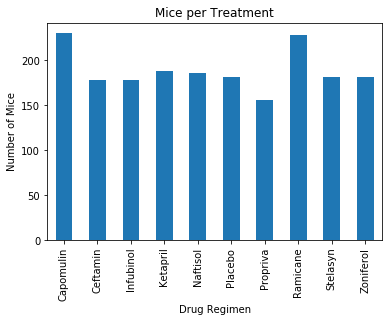

In [124]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
treatment_bar = treatment_data['Mouse ID'].count().plot.bar(title = 'Mice per Treatment')
plt.ylabel('Number of Mice')

treatment_bar

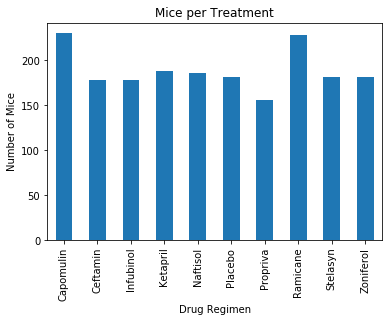

In [125]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
treatment_bar = treatment_data['Mouse ID'].count().plot(kind = 'bar', title = 'Mice per Treatment')
treatment_bar.set_ylabel('Number of Mice')
plt.show()


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f8f606a7828>],
      dtype=object)

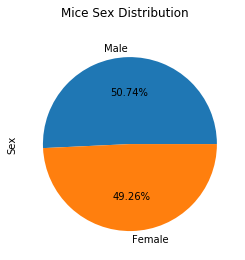

In [126]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
mice_sex = finalized_data['Sex'].value_counts().plot.pie(subplots = True, title = 'Mice Sex Distribution', autopct = '%1.2f%%')
mice_sex

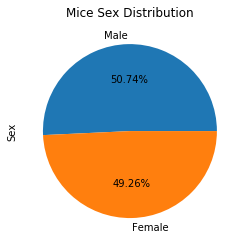

In [127]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
mice_sex = finalized_data['Sex'].value_counts().plot(kind = 'pie', title = 'Mice Sex Distribution', autopct = '%1.2f%%')
plt.show()


## Quartiles, Outliers and Boxplots

In [128]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
finalized_data_sorted = finalized_data.sort_values(['Mouse ID', 'Timepoint'])
finalized_data_sorted = finalized_data_sorted.drop_duplicates(subset = 'Mouse ID', keep = 'last')

# Create dataframe with tumor volume at the last timepoint
final_tumor_volume = finalized_data_sorted.loc[
                                    (finalized_data_sorted['Drug Regimen'] == 'Capomulin') |
                                    (finalized_data_sorted['Drug Regimen'] == 'Ramicane') |
                                    (finalized_data_sorted['Drug Regimen'] == 'Infubinol') |
                                    (finalized_data_sorted['Drug Regimen'] == 'Ceftamin')]
final_tumor_volume


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
463,a203,Infubinol,Female,20,23,45,67.973419,2
473,a251,Infubinol,Female,21,25,45,65.525743,1
493,a275,Ceftamin,Female,20,28,45,62.999356,3
327,a411,Ramicane,Male,3,22,45,38.407618,1
430,a444,Ramicane,Female,10,25,45,43.047543,0
214,a520,Ramicane,Male,13,21,45,38.810366,1
530,a577,Infubinol,Female,6,25,30,57.031862,2
174,a644,Ramicane,Female,7,17,45,32.978522,1
540,a685,Infubinol,Male,8,30,45,66.083066,3
309,b128,Capomulin,Female,9,22,45,38.982878,2


In [182]:
# Put treatments into a list for for loop (and later for plot labels)
# Create empty list to fill with tumor vol data (for plotting)

treatments = ['Capomulin','Ramicane', 'Infubinol', 'Ceftamin']
tumor_volume_data = []

for treatment in treatments:
    each_treatment = final_tumor_volume.loc[final_tumor_volume['Drug Regimen'] == treatment]
    treatment_volume =  each_treatment['Tumor Volume (mm3)']
    tumor_volume_data.append(treatment_volume)
    
    # Calculate the IQR and quantitatively determine if there are any potential outliers. 
    # Determine outliers using upper and lower bounds
    quartiles = treatment_volume.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers=[]
    for value in treatment_volume:
        if (value < lower_bound) or (value > upper_bound):
            outliers.append(value)
        
    print(treatment)
    print(f"Lower quartile: {lowerq}")
    print(f"Upper quartile: {upperq}")
    print(f"Interquartile Range: {iqr}")
    print(f"Outliers: Values less than {lower_bound} or greater than {upper_bound}.")
    if len(outliers) == 0:
        print (f"There are no outliers for this treament.")
    else:
        index = len(outliers)-1
        print(f"Outliers for this treatment are: {outliers[index]}.")
    print(' ')
    print(' ')
    
    

Capomulin
Lower quartile: 32.37735684
Upper quartile: 40.1592203
Interquartile Range: 7.781863460000004
Outliers: Values less than 20.70456164999999 or greater than 51.83201549.
There are no outliers for this treament.
 
 
Ramicane
Lower quartile: 31.56046955
Upper quartile: 40.65900627
Interquartile Range: 9.098536719999998
Outliers: Values less than 17.912664470000003 or greater than 54.30681135.
There are no outliers for this treament.
 
 
Infubinol
Lower quartile: 54.04860769
Upper quartile: 65.52574285
Interquartile Range: 11.477135160000003
Outliers: Values less than 36.83290494999999 or greater than 82.74144559000001.
Outliers for this treatment are: 36.321345799999996.
 
 
Ceftamin
Lower quartile: 48.72207785
Upper quartile: 64.29983003
Interquartile Range: 15.577752179999997
Outliers: Values less than 25.355449580000002 or greater than 87.66645829999999.
There are no outliers for this treament.
 
 


<function matplotlib.pyplot.show(*args, **kw)>

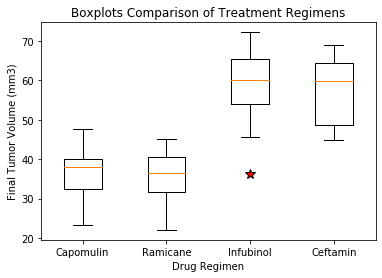

In [224]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
# Outlier shape changed to a red star
plt.boxplot(tumor_volume_data, sym='*',flierprops={'markersize': 10, 'markerfacecolor': 'red'})
plt.ylabel('Final Tumor Volume (mm3)')
plt.xlabel('Drug Regimen')
plt.xticks(ticks=[1,2,3,4], labels = treatments)
plt.title('Boxplots Comparison of Treatment Regimens')
plt.show

## Line and Scatter Plots

<function matplotlib.pyplot.show(*args, **kw)>

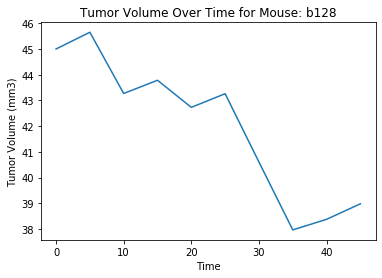

In [212]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

# Create a dataframe with all of the treatment data for mice treated with Capomulin
capomulin_mice = finalized_data.loc[finalized_data['Drug Regimen'] == 'Capomulin']
capomulin_mice_count = capomulin_mice.groupby('Mouse ID').count()

# Select the first mouse that has 10 time point entries to create a more accurate line plot.
mouse = capomulin_mice_count.loc[capomulin_mice_count['Tumor Volume (mm3)'] == 10].index[0]
mouse_information = finalized_data.loc[finalized_data['Mouse ID'] == mouse]

# Create line plot
plt.plot(mouse_information['Timepoint'],mouse_information['Tumor Volume (mm3)'])
plt.ylabel('Tumor Volume (mm3)')
plt.xlabel('Time')
plt.title(f"Tumor Volume Over Time for Mouse: {mouse}")
plt.show


<function matplotlib.pyplot.show(*args, **kw)>

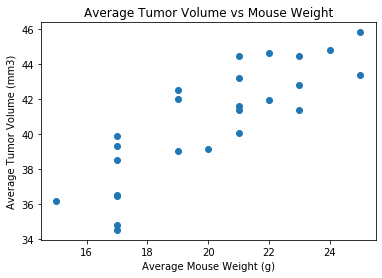

In [225]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
averages_df = capomulin_mice.groupby('Mouse ID').mean()
mice_weight = averages_df['Weight (g)']
mice_tumor_volume = averages_df['Tumor Volume (mm3)']

plt.scatter(mice_weight, mice_tumor_volume)
plt.ylabel('Average Tumor Volume (mm3)')
plt.xlabel('Average Mouse Weight (g)')
plt.title('Average Tumor Volume vs Mouse Weight')
plt.show


## Correlation and Regression

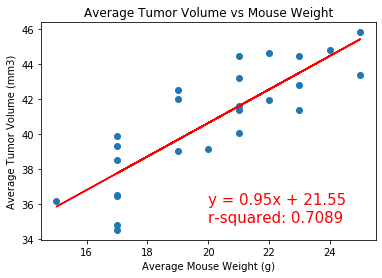

In [240]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

x_values = mice_weight
y_values = mice_tumor_volume

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,36),fontsize=15,color="red")
rsquared = 'r-squared: ' + str(round(rvalue**2,4))
plt.annotate(rsquared,(20,35),fontsize=15,color="red")
plt.ylabel('Average Tumor Volume (mm3)')
plt.xlabel('Average Mouse Weight (g)')
plt.title('Average Tumor Volume vs Mouse Weight')
plt.show()
